# Housing Price Model
    
   ## This is a Supervised learning model developed by using training data set downloaded from Github. The end product was tested with a test data set, which resulted in low error and successfully launched.
   
 ## Note: This particular Machine learning project was initiated by Aurelien Geron and some of the codes below are gotten from his book.

In [1]:
# The needed modules for this analysis

import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, truncnorm, randint

# Data Loading

In [2]:
# Read and open the data

housing = pd.read_csv('housingreg.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Exploration

In [3]:
# Obtain statistical information about the data set

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
# General information about the data set

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [5]:
# The total size and number of columns in the data set

housing.shape

(20640, 10)

In [6]:
# The unique categories of ocean_proximity category

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Data Cleaning

In [7]:
# Null check

housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Replace the null values with median

median = housing.median()
housing.fillna(median, inplace=True)

In [9]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Data Splitting

## According to experts, it was stated that median income is a very important feature for predicting house price. And it's very important to ensure good data representation across the data set.

## Stratified function was used to split the housing data set into evenly distributed strata.

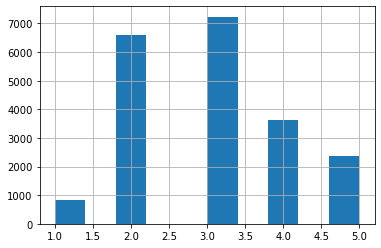

In [10]:
# Preparing the median_income column for the shuffling

housing['income'] = pd.cut(housing['median_income'],
bins=[0,1.5,3.0,4.5,6.0,np.inf],
labels=[1,2,3,4,5])
housing['income'].hist()
plt.show()

In [11]:
# Spliting the data into stratas to prevent sampling bias

Strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in Strat.split(housing, housing['income']):
    strat_train = housing.loc[train]
    strat_test = housing.loc[test]
strat_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


In [12]:
# Check the proportion of the income column and compare it with thw original data set

strat_train['income'].value_counts()/len(strat_train)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income, dtype: float64

In [13]:
# The proportion of income in the original data set

housing['income'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income, dtype: float64

# Determining correlations between predictors and target

## The corr_matrix plot clearly proves that median income is strongly related to the target(median house value).

## Some other columns are also related to the target column

In [14]:
# Detecting correlations amongst all the variables

corr_matrix = housing.corr()
corr_matrix.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


In [15]:
# show the relationship between the predictors and target 

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# Graphical Analysis

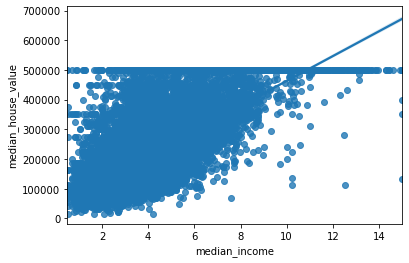

In [16]:
# regplot of median income and median house value

sns.regplot(x='median_income', y='median_house_value', data=housing)
plt.show()

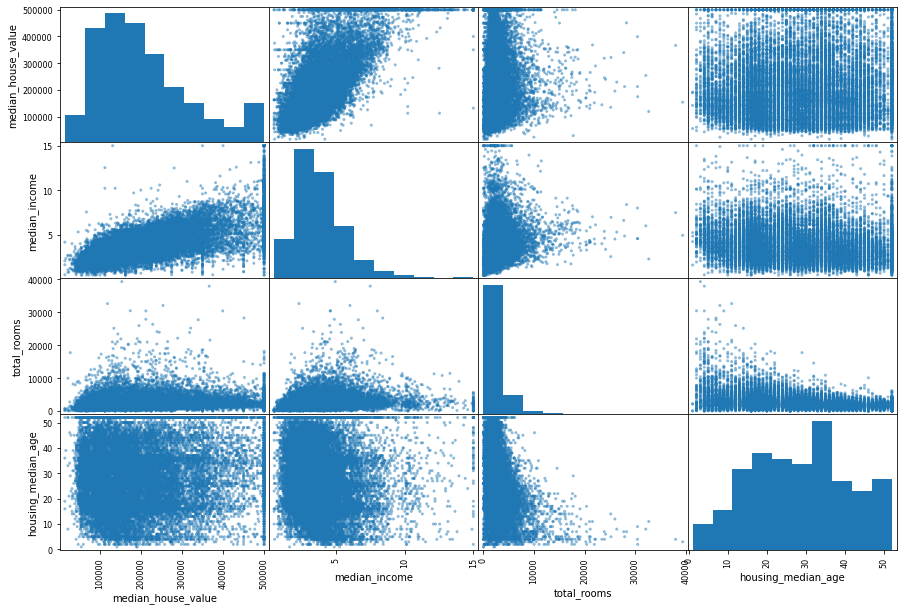

In [17]:
# Scattermatrix plot of some promising features

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(15, 10))
plt.show()

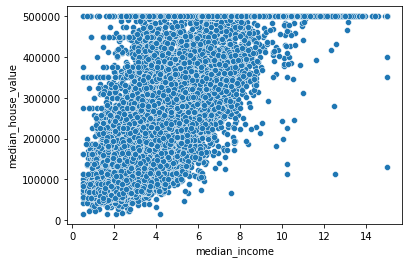

In [18]:
#Scatterplot of median income and median house value

sns.scatterplot(x='median_income', y='median_house_value', data=housing)
plt.show()

# Preparing predictors and target columns

In [19]:
#drop the income column

for caterg in (strat_train, strat_test):
    caterg.drop('income', axis=1, inplace=True)

In [20]:
# Create the predictor variables(x) and target or label variables(y)

housing_predictors = strat_train.drop('median_house_value', axis=1)
housing_label = strat_train['median_house_value'].copy()
housing_label 

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [21]:
# Drop the categorical column

housing_num = housing_predictors.drop('ocean_proximity', axis=1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [22]:
housing_catergory = ['ocean_proximity']
housing_catergory 

['ocean_proximity']

# Pipeline

In [23]:
# Use Pipeline to transform and scale the data

housing_numattr = list(housing_num)
category = ['ocean_proximity']
Pipe = ColumnTransformer([
   ('scaler',StandardScaler(), housing_numattr),
   ('category', OneHotEncoder(), category)
])
housing_input = Pipe.fit_transform(housing_predictors)
housing_input

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [24]:
# Convert the built pipeline into dataframe

labels =['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','IH_0CEAN'
         ,'INLAND', 'NEAR_OCEAN','NEAR_BAY', 'ISLAND']
table = pd.DataFrame(housing_input)
table.columns=labels
table

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,IH_0CEAN,INLAND,NEAR_OCEAN,NEAR_BAY,ISLAND
0,-1.156043,0.771950,0.743331,-0.493234,-0.445490,-0.636211,-0.420698,-0.614937,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036986,-0.998331,-1.022227,1.336459,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153393,-0.433639,-0.093318,-0.532046,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396807,0.036041,-0.383436,-1.045566,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412192,2.724154,2.570975,-0.441437,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725416,-0.759010,-0.764049,0.554158,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584236,-0.329664,-0.636291,-0.948815,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822698,0.607904,0.713156,-0.316705,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374900,-0.057178,-0.375451,0.098121,1.0,0.0,0.0,0.0,0.0


# Linear Regression Model Training

In [25]:
# Create a Linear Regression function

def linreg(x, y):
    lin_reg = LinearRegression()
    model = lin_reg.fit(x, y)
    inte = model.intercept_
    coef = model.coef_
    pred = model.predict(x)
    lin_mse = mean_squared_error(y, pred)
    lin_rmse = np.sqrt(lin_mse)
    
    print('Intercept: ', inte)
    print('Coef: ', coef)
    print('Predictions: ', pred)
    print('MSE: ', lin_mse)
    print('RMSE: ', lin_rmse)
    
    
linreg(housing_input, housing_label)

Intercept:  237781.22983155592
Coef:  [-53160.08679907 -54022.75609711  13721.54695381 -10015.64822614
  29939.32792622 -43813.67200535  28890.1665424   73738.44432083
 -18139.52749898 -57840.95193039 112925.44278798 -22511.91119741
 -14433.05216121]
Predictions:  [211572.41329225 321344.7066031  210944.7899533  ...  98101.95544757
 217370.69521299 277014.46293934]
MSE:  4768031173.463353
RMSE:  69050.93173494007


# SDGRegressor Model Training

In [26]:
# Use SDGRegressor model to train your data

sdg_reg = SGDRegressor(penalty='l2')
sdg_model = sdg_reg.fit(housing_input, housing_label)
sdg_model.intercept_
sdg_model.coef_
pred1 = sdg_model.predict(housing_input)
sdg_mse = mean_squared_error(housing_label, pred1)
sdg_rmse = np.sqrt(sdg_mse)
sdg_rmse
    

69163.49225335724

In [27]:
# List the coefficients of each feature

for (i,v) in enumerate(sdg_model.coef_):
    print(i,'Feature: ', v)

0 Feature:  -53456.87222614013
1 Feature:  -52527.15137348863
2 Feature:  12577.941002529327
3 Feature:  -10337.907426931242
4 Feature:  29688.237893207723
5 Feature:  -44652.032428838655
6 Feature:  27788.438211319226
7 Feature:  74249.17791047123
8 Feature:  49514.41010803821
9 Feature:  11293.590893899596
10 Feature:  4851.697112598531
11 Feature:  45693.7095735407
12 Feature:  53648.03229188978


# SDG Model Evaluation

In [28]:
# Use cross val score method to evaluate the sdg model

sdg_cross_score= cross_val_score(sdg_reg, housing_input, housing_label, scoring='neg_mean_squared_error', cv=10)
sdg_rmse_score = np.sqrt(-sdg_cross_score)
sdg_rmse_score

def display(score):
    print('score: ', score)
    print('mean: ', score.mean())
    print('std: ', score.std())
    
display(sdg_rmse_score)

score:  [67542.16985421 67505.85859938 68492.80736107 74595.37772058
 68324.40561812 71512.13552581 65428.38966088 68602.47131446
 72362.90180846 68402.35173264]
mean:  69276.8869195597
std:  2578.847300049879


In [29]:
# Output the score

sdg_rsquared= cross_val_score(sdg_reg, housing_input, housing_label, cv=10)
sdg_rsquared.mean()

0.6399072372809926

# DecisionTreeRegressor Model Training

In [ ]:
# Use DecisionTreeRegressor model to train your data

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_input, housing_label)
pred2 = tree_reg.predict(housing_input)
tree_mse = mean_squared_error(housing_label, pred2)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

 # DecisionTreeRegressor Model Evaluation

In [31]:
# Use cross val score method to evaluate the DecisionTreeRegressor model

tree_cross_score= cross_val_score(tree_reg, housing_input, housing_label, scoring='neg_mean_squared_error', cv=10)
tree_rmse_score = np.sqrt(-tree_cross_score)
tree_rmse_score

def display(score):
    print('score: ', score)
    print('mean: ', score.mean())
    print('std: ', score.std())
    
display(tree_rmse_score)

score:  [66463.02684439 66059.93909193 73439.67441705 71074.00393372
 69168.17899081 76024.34788057 67845.89349489 69289.49335446
 69647.28995867 69631.20338147]
mean:  69864.30513479591
std:  2884.875665754517


In [ ]:
# Output the score

tree_rsquared= cross_val_score(tree_reg, housing_input, housing_label, cv=10)
tree_rsquared.mean()

# RandomForest Model Training

In [33]:
# Use RandomForest model to train your data

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_input, housing_label)
forest_pred = forest_reg.predict(housing_input)
forest_mse = mean_squared_error(housing_label,forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


18318.502427263473

# RandomForest Model Evaluation

In [34]:
# Use cross val score method to evaluate the RandomForest model

forest_cross_score= cross_val_score(forest_reg, housing_input, housing_label, scoring='neg_mean_squared_error', cv=10)
forest_rmse_score = np.sqrt(-forest_cross_score)
forest_rmse_score

display(forest_rmse_score)

score:  [48025.36543898 45838.10058934 49083.68910316 49821.57190583
 48832.79120749 53516.78130127 48726.06146127 50310.10259931
 51573.72455217 49468.52993952]
mean:  49519.6718098336
std:  1949.1838906556357


In [35]:
# Output the score

forest_rsquared= cross_val_score(forest_reg, housing_input, housing_label, cv=10)
forest_rsquared.mean()

0.8158442787305894

# RandomizedSearchCV Model Training

In [ ]:
# Use RandomizedSearch to fine-tune your model for better evaluation 

model_params = {
    'n_estimators' : randint(4,200),
    'max_features' : truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    'min_samples_split' : uniform(0.01, 0.199)
}
forest_reg = RandomForestRegressor()

randomsearch = RandomizedSearchCV(forest_reg,model_params, n_iter=100, cv=5,random_state=1)
random_model = randomsearch.fit(housing_input, housing_label)
random_model.best_estimator_.get_params()

In [ ]:
random_pred = random_model.predict(housing_input)
random_mse = mean_squared_error(housing_label, random_pred)
random_rmse = np.sqrt(random_mse)

# GridSearchCV Model Training

In [ ]:
# Use GridSearchCV to fine-tune your model for better evaluation 

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False],'n_estimators':[3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_input, housing_label)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.cv_results_

In [ ]:
grid_pred = grid_search.predict(housing_input)
grid_mse = mean_squared_error(housing_label, grid_pred)
grid_rmse = np.sqrt(grid_mse)

# Final System Evaluation

In [ ]:
# final model!

final_model= grid_search.best_estimator_
X_test = strat_test.drop('median_house_value', axis=1)
Y_test = strat_test['median_house_value'].copy()

X_test_input = Pipe.transform(X_test)

final_predictions = final_model.predict(X_test_input)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

# Final Note

## The GridSearchCV model scored the least error amongst the other models used in this notebook and it was utilized to carry out the final system evaluation.